# 이미지검출-윤곽선

## 1. 컨투어(Contour) : 경계선을 연결한 선
- 컨투어(우리말로 등고선, 윤곽선, 외곽선 등으로 번역)s는 지도에서 지형의 높이가 같은 영역을 하나의 선으로 표시하는 용도로 많이 사용됨
- 영상에서는 같은 색상이나 밝기의 연속된 점을 찾아 잇는 곡선을 찾아내면 모양 분석과 객체 인식에 사용할 수 있음

- `contour, hierarchy = cv2.findCountours(src, mode, method[, contours, hierarchy, offset])[-2:]`
    - src : 입력 이미지, 바이너리 스케일, 검은색 배경 흰색 전경
    mode : 컨투어 제공 방식 선택
    - cv2.RETR_EXTERNAL : 가장 바깥쪽 라인만 제공
    - cv2.RETR_LIST : 모든 라인을 계층 없이 제공
    - cv2.RETR_CCOMP : 모든 라인을 2계층으로 제공
    - cv2.RETR_TREE : 모든 라인의 모든 계층 정보를 트리 구조로 제공
    - method : 근사 값 방식 선택
    - cv2.CHAIN_APPROX_NONE : 근사 계산하지 않고 모든 좌표 제공
    - cv2.CHAIN_APPROX_SIMPLE : 컨투어 꼭짓점 좌표만 제공
    - cv2.CHAIN_APPROX_TC89_L1 : Teh-Chin 알고리즘으로 좌표 개수 축소
    - cv2.CHAIN_APPROX_TC89_KCOS : Teh-Chin 알고리즘으로 좌표 개수 축소
    - contours : 검출한 건투어 좌표, 파이썬 리스트
    - hierarchy : 컨투어 계층 정보
    
- `cv2.drawContours(img, contours, contourIdx, color, thickness)`
    - img : 입력 영상
    - contours : 그림 그릴 컨투어 배열
    - contourIdx : 그림 그릴 컨투어 인덱스, -1 : 모든 컨투어 표시
    - color : 색상
    - thickness : 선 두께, 0:채우기


## **2. 윤곽선 검출 : findContours()**
- 원본이미지를 직접 수정하는 함수임. 따라서 원본이미지를 보존하기위해 복사해서 사용

## **3. 윤곽선 그리기 : drawContours()**

pixabay - poker  

https://pixabay.com/ko/vectors/%ec%b9%b4%eb%93%9c-%ea%b2%8c%ec%9e%84-%ec%97%90%ec%9d%b4%ec%8a%a4-%eb%84%a4-161404/

In [1]:
import cv2
# 1. 이미지 읽기
img = cv2.imread('../cv_images/card.png')
target_img = img.copy()  # 사본이미지

# 2. 회색조 이미지로 변경
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 코드입력

# 3. 이진 이미지 변경 - 이진화적용 : 최적의 임계치를 찾아 이진화
ret, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) # 코드입력

# 4.윤곽선 검출 -구조. 계층구조 
contours , hierarchy = cv2.findContours(otsu, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) # 코드입력
# 윤곽선 정보, 구조 = 대상이미지, 윤곽선 찾는 모드(mode), 윤곽선 찾을때 사용하는 근사치(method)

# 5.윤곽선 그리기 : 두께 2
COLOR = (0, 200, 2) # 녹색
for cnt in contours:
    if cv2.contourArea(cnt) > 25000:
        cv2.drawContours(target_img, [cnt], -1, COLOR, 2) # 코드입력
                # 대상이미지, 윤곽선 정보, 인덱스(-1 이면 전체), 색깔, 두께

cv2.imshow('img', img)
cv2.imshow('gray', gray)
cv2.imshow('otsu', otsu)
cv2.imshow('contour', target_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 윤곽선 찾을 때 근사치 방법

### <span style="color:blue">@khs - cv2.findContours() : 이진화 이미지에서 윤곽선(컨투어)를 검색
    
> https://bkshin.tistory.com/entry/OpenCV-22-%EC%BB%A8%ED%88%AC%EC%96%B4Contour

- `contours, hierarchy = cv2.findContours(binary, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)`
- contours : 이미지에서 경계를 찾고, 경계 좌표를 contours와 같은 형태로 반환합니다.
- 윤곽선, 계층구조 = cv2.findContours(이진화 이미지, 검색 방법, 근사화 방법)

    - 검색 방법
        - cv2.RETR_EXTERNAL : 외곽 윤곽선만 검출하며, 계층 구조를 구성하지 않습니다.
        - cv2.RETR_LIST : 모든 윤곽선을 검출하며, 계층 구조를 구성하지 않습니다.
        - cv2.RETR_CCOMP : 모든 윤곽선을 검출하며, 계층 구조는 2단계로 구성합니다.
        - cv2.RETR_TREE : 모든 윤곽선을 검출하며, 계층 구조를 모두 형성합니다. (Tree 구조)
    - 근사화 방법
        - cv2.CHAIN_APPROX_NONE : 윤곽점들의 모든 점을 반환합니다.
        - cv2.CHAIN_APPROX_SIMPLE : 윤곽점들 단순화 수평, 수직 및 대각선 요소를 압축하고 끝점만 남겨 둡니다.
        - cv2.CHAIN_APPROX_TC89_L1 : 프리먼 체인 코드에서의 윤곽선으로 적용합니다.
        - cv2.CHAIN_APPROX_TC89_KCOS : 프리먼 체인 코드에서의 윤곽선으로 적용합니다.    
    - contours : Numpy 구조의 배열로 검출된 윤곽선의 지점들이 담겨있음
    - hierarchy : 윤곽선의 계층 구조를 의미. 윤곽선의 포함 관계 여부 나타냄 (외곽/내곽/같은 게층구조)윤곽선에 해당하는 속정 정보 포함함

### 윤곽선 찾기 모드
- cv2.RETR_EXTERNAL : 가장 외곽의 윤곽선만 찾음         
<br>    
- cv2.RETR_LIST : 모든 윤곽선 찾음(계층 정보 없음)  
<img src='../cv_images/No_계층구조.png'><br>

- cv2.RETR_TREE : 모든 윤곽선 찾음(계층 정보를 트리 구조로 생성)
<img src='../cv_images/계층구조.png'>

### <span style="color:blue">@khs - cv2.drawContours(): 검출된 윤곽선 그리기

- `cv2.drawContours(image, contours, contourIdx, color[, thickness[, lineType[, hierarchy[, maxLevel[, offset]]]]]	) ->	image`
    
    - cv2.drawContours(이미지, [윤곽선], 윤곽선 인덱스, (B, G, R), 두께, 선형타입)
    - image : 윤곽선을 그릴 대상 이미지 - 빈 캔버스에 그림
    - 윤곽선 : 검출된 윤곽선들이 저장된 Numpy 배열(좌표 리스트)
    - 윤곽선 인덱스: 검출된 윤곽선 배열에서 몇 번째 인덱스의 윤곽선을 그릴지를 의미합니다.

        - 윤곽선 인덱스를 0으로 사용할 경우 0 번째 인덱스의 윤곽선을 그리게 됩니다. 하지만, 윤곽선 인수를 대괄호로 다시 묶을 경우, 0 번째 인덱스가 최댓값인 배열로 변경됩니다.
        - 동일한 방식으로 [윤곽선], 0과 윤곽선, -1은 동일한 의미를 갖습니다. (-1은 윤곽선 배열 모두를 의미)
        
        - 예시 [ 2 -1 1 -1]  : [다음 윤곽선, 이전 윤곽선, 내곽 윤곽선, 외곽 윤곽선]에 대한 인덱스 정보를 포함

            - 인덱스 0의 윤곽선의 다음 윤곽선은 인덱스 2의 윤곽선을 의미하며 이전 윤곽선은 존재하지 않다는 것을 의미
            - 내곽 윤곽선은 인덱스 1에 해당하는 윤곽선을 자식 윤곽선으로 두고 있다는 의미입니다.즉, 인덱스 0 윤곽선 내부에 인덱스 1의 윤곽선이 포함되어 있습니다.
            - 외곽 윤곽선은 -1의 값을 갖고 있으므로 외곽 윤곽선은 존재하지 않습니다.

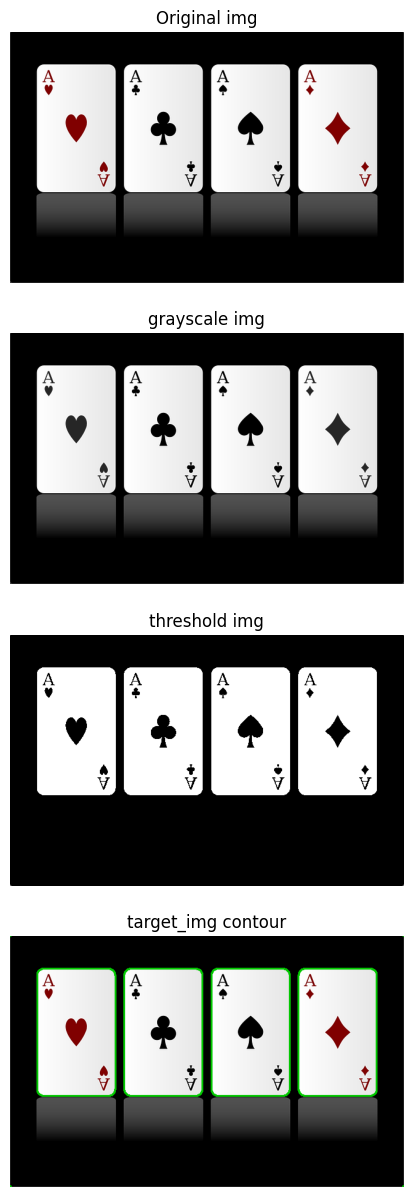

In [2]:
import cv2
import matplotlib.pyplot as plt

# 1. 이미지 읽기
img = cv2.imread('../cv_images/card.png')
target_img = img.copy()  # 사본이미지

# 2. 회색조 이미지로 변경
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
ret, otsu = cv2.threshold(gray, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU )

# 3. 이진 이미지 변경 - 이진화적용 : 최적의 임계치를 찾아 이진화 
#contours , hierarchy = cv2.findContours(otsu, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
contours , hierarchy = cv2.findContours(otsu, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
#contours , hierarchy = cv2.findContours(otsu, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# print(contours)

# 4. 윤곽선 그리기 : 두께 2
COLOR = (0, 200, 2) # 녹색
cv2.drawContours(target_img, contours, -1, COLOR, 2) 
                # 대상이미지, 윤곽선 정보, 인덱스(-1 이면 전체), 색깔, 두께

# cv2.imshow('img', img)
# cv2.imshow('gray', gray)
# cv2.imshow('otsu', otsu)
# cv2.imshow('contour', target_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# 결과 출력
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)
otsu = cv2.cvtColor(otsu, cv2.COLOR_BGR2RGB)
target_img = cv2.cvtColor(target_img, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(10, 15))
plt.subplot(411), plt.axis('off'), plt.imshow(img), plt.title("Original img")
plt.subplot(412), plt.axis('off'), plt.imshow(gray), plt.title("grayscale img")
plt.subplot(413), plt.axis('off'), plt.imshow(otsu), plt.title("threshold img")
plt.subplot(414), plt.axis('off'), plt.imshow(target_img), plt.title("target_img contour")
plt.show()

## 경계 사각형
윤곽선의 경계면을 둘러싸는 사각형

> boundingRect()

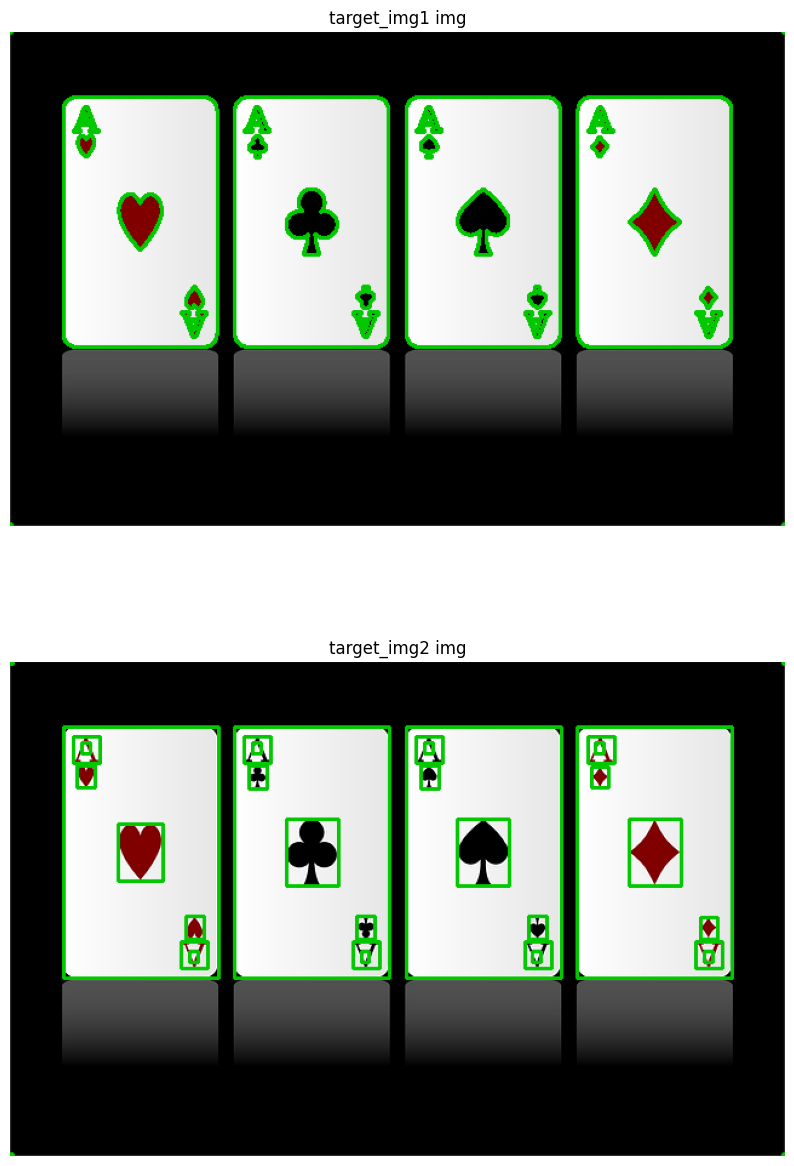

In [3]:
import cv2
import matplotlib.pyplot as plt
# 1. 이미지 읽기
img = cv2.imread('../cv_images/card.png')
target_img1 = img.copy()  # 사본이미지
target_img2 = img.copy()  # 사본이미지

# 2. 회색조 이미지로 변경
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
# 3. 이진 이미지 변경 - 이진화적용 : 최적의 임계치를 찾아 이진화
ret, otsu = cv2.threshold(gray, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU )

# 4. 윤곽선 검출 -구조. 계층구조
contours , hierarchy = cv2.findContours(otsu, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# 5.윤곽곽선 정보, 구조 = 대상이미지, 윤곽선 찾는 모드(mode), 윤곽선 찾을때 사용하는 근사치(method)
COLOR = (0, 200, 2) # 녹색
cv2.drawContours(target_img1, contours, -1, COLOR, 2) 
                # 대상이미지, 윤곽선 정보, 인덱스(-1 이면 전체), 색깔, 두께

# 6. 윤곽선 그리기 : 두께 2 - 사각형으로 그리기
for cnt in contours:
    x, y, width, height = cv2.boundingRect(cnt)  # 코드입력 # 사각형찾기기
    cv2.rectangle(target_img2, (x, y), (x + width, y + height), COLOR, 2)  # 코드입력   # 사각형 그리기

target_img1 = cv2.cvtColor(target_img1, cv2.COLOR_BGR2RGB)
target_img2 = cv2.cvtColor(target_img2, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(10, 15))
plt.subplot(211), plt.axis('off'), plt.imshow(target_img1), plt.title("target_img1 img")
plt.subplot(212), plt.axis('off'), plt.imshow(target_img2), plt.title("target_img2 img")
plt.show()

# cv2.imshow('img', img)
# cv2.imshow('gray', gray)
# cv2.imshow('otsu', otsu)
#cv2.imshow('contour', target_img)

# cv2.waitKey(0)
# cv2.destroyAllWindows()

## 면적
특정 면적 이상의 윤곽선만 찾고 싶을 때사용
> contourArea()

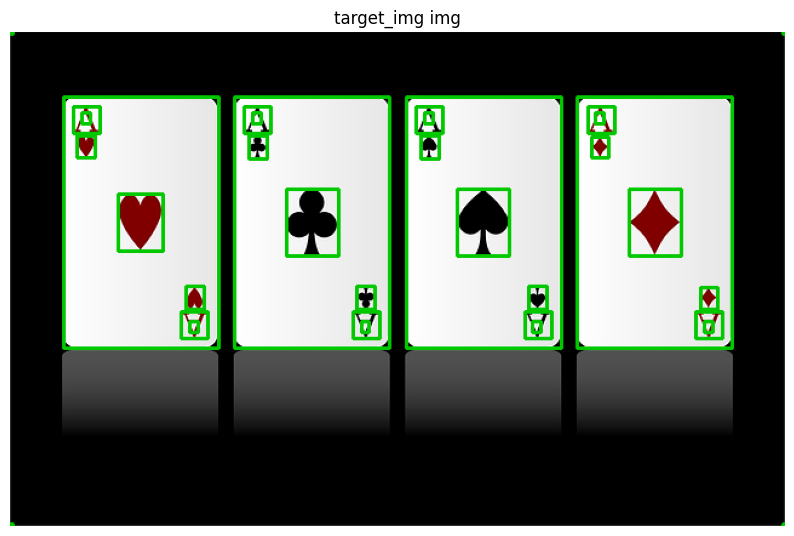

In [4]:
# 일정 면적 이상의 외곽에 사각형 그리기 / 경계선을 가장 외곽만 찾기와 비슷함
import cv2

# 1. 이미지 읽기
img = cv2.imread('../cv_images/card.png')
target_img = img.copy()  # 사본이미지

# 2. 회색조 이미지로 변경
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  

# 3. 이진 이미지 변경 - 이진화적용 : 최적의 임계치를 찾아 이진화
ret, otsu = cv2.threshold(gray, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU )

# 4. 윤곽선 검출 -구조. 계층구조
contours , hierarchy = cv2.findContours(otsu, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# 5. 윤곽선 그리기 : 두께 2 - 사각형으로 그리기
COLOR = (0, 200, 2) # 녹색
for cnt in contours:
    # 일정 면적 이상(300) 의 외곽에 사각형 그리기
    if ...  : # 코드입력  # 카드한장크기 : 가로130 * 세로 205= 26650
        x, y, width, height = cv2.boundingRect(cnt)
        cv2.rectangle(target_img, (x, y), (x+width, y+ height), COLOR, 2)
        
# for cnt in contours:
#     if cv2.contourArea(cnt) > 25000:
#         cv2.drawContours(target_img, [cnt], -1, COLOR, 2)

target_img = cv2.cvtColor(target_img, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(10, 15))
plt.axis('off'), plt.imshow(target_img), plt.title("target_img img")
plt.show()
                
# cv2.imshow('img', img)
# cv2.imshow('contour', target_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()